# 삼성 주가 예측

In [1]:
import tensorflow as tf

In [6]:
!pip install pykrx

In [7]:
from pykrx import stock

In [8]:
stock_name = stock.get_market_ticker_name("005930")
stock_name

'삼성전자'

In [9]:
# 삼성전자의 20220601~20220726 주가데이터
raw_df = stock.get_market_ohlcv_by_date(fromdate="20210101", todate="20211201", ticker="005930")
raw_df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-04,81000,84400,80200,83000,38655276
2021-01-05,81600,83900,81600,83900,35335669
2021-01-06,83300,84500,82100,82200,42089013
2021-01-07,82800,84200,82700,82900,32644642
2021-01-08,83300,90000,83000,88800,59013307


In [38]:
raw_df.tail()

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-11-25,75100,75100,73600,73700,12559258
2021-11-26,73500,74100,72000,72300,13002242
2021-11-29,71700,73000,71400,72300,16682559
2021-11-30,73200,73900,70500,71300,30364841
2021-12-01,72000,74800,71600,74400,21954856


In [10]:
df=raw_df[['종가']]
df.reset_index(inplace=True)
df

,날짜,종가
0,2021-01-04,83000
1,2021-01-05,83900
2,2021-01-06,82200
3,2021-01-07,82900
4,2021-01-08,88800
...,...,...
222,2021-11-25,73700
223,2021-11-26,72300
224,2021-11-29,72300
225,2021-11-30,71300


# ARIMA 사용해서 삼성 주가 예측

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [40]:
# ARIMA model 생성
model = ARIMA(df.종가.values, order=(2,1,2)) # order 안의 파라미터는 (AR, Difference, MA)
fit = model.fit()
fit.summary() # 생성 모델에 대한 summary 확인

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  227
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1905.518
Date:                Wed, 27 Jul 2022   AIC                           3821.036
Time:                        02:30:41   BIC                           3838.139
Sample:                             0   HQIC                          3827.938
                                - 227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1096      0.126      0.869      0.385      -0.138       0.357
ar.L2          0.8834      0.125      7.053      0.000       0.638       1.129
ma.L1         -0.0988      0.156     -0.635      0.526      -0.404       0.206
ma.L2         -0.9012      0.114     -7.921      0.000      -1.124      -0.678
sigma2      1.221e+06    1.1e-07   1.11e+13      0.000    1.22e+06    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               274.82
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             1.07
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.26e+28. Standard errors may be unstable.
"""

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib as mpl
%matplotlib inline
#pd.set_option('display.max_rows', None)

plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family']='Malgun Gothic'

NameError: name 'plot' is not defined

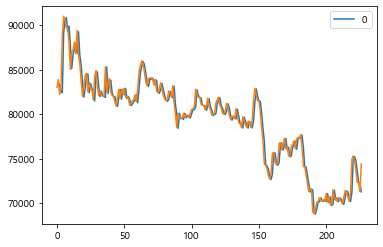

In [41]:
# *-- 예측 결과를 시각화 --*
import matplotlib.pyplot as plt
import pandas as pd

pred = pd.DataFrame(fit.predict())
pred[1:].plot()
df['종가'].plot()
plot.show()

<AxesSubplot:>

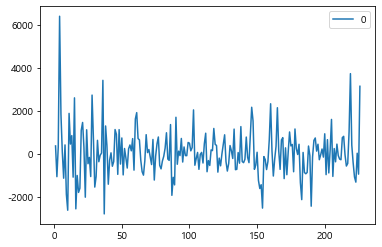

In [42]:
# 잔차 시각화
residuals = pd.DataFrame(fit.resid)
residuals[1:].plot()

In [43]:
# 이후 10일에 대한 주가 예측을 시도
fit.forecast(steps=10)

array([74403.95632132, 74317.90148229, 74311.96706555, 74235.29895495,
       74221.6559362 , 74152.43508048, 74132.79856889, 74069.4996342 ,
       74045.21756216, 73986.64081864])

In [45]:
# 실제 데이터 확인
forecasts = stock.get_market_ohlcv_by_date(fromdate="20211202", todate="20211212", ticker="005930")
forecasts

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-12-02,73900,75800,73800,75800,23652940
2021-12-03,75600,76000,74100,75600,18330240
2021-12-06,75100,76700,74900,76300,16391250
2021-12-07,76100,77700,75600,77400,19232453
2021-12-08,78300,78600,77100,77400,21558340
2021-12-09,77400,78200,77000,78200,21604528
2021-12-10,77400,77600,76800,76900,9155219


- 안맞는것같은데..?

### yfinance 사용해보기1

In [7]:
!pip install yfinance

  Using cached yfinance-0.1.74-py2.py3-none-any.whl (27 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-2.1.0-py3-none-any.whl (39 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


In [8]:
import yfinance as yf

In [49]:
#삼성전자 주가 다운로드(2020-01-01 ~ 2021-12-01)
samsung = yf.download('005930.KS', start='2020-01-01', end='2021-12-01')
samsung

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51557.593750,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,51837.796875,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,51837.796875,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,52118.000000,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,53052.019531,23501171
...,...,...,...,...,...,...
2021-11-24,76000.0,76200.0,74100.0,74800.0,74080.796875,15652305
2021-11-25,75100.0,75100.0,73600.0,73700.0,72991.375000,12559258
2021-11-26,73500.0,74100.0,72000.0,72300.0,71604.843750,13002242


In [51]:
# [close == 종가]
samsung = samsung[['Close']]
samsung.reset_index(inplace=True)
samsung = samsung.rename(columns = {'Close' : 'Price'})
samsung.head(3)

,Date,Price
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0


<AxesSubplot:xlabel='Date'>

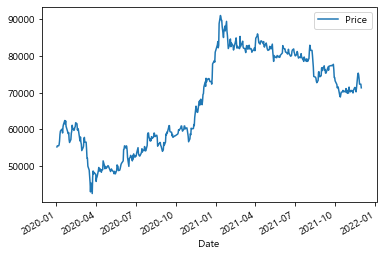

In [52]:
# 날짜별 주가 확인(line-plot)
samsung.plot(x='Date', y='Price', kind='line')

In [53]:
# ARIMA model 생성
model = ARIMA(samsung.Price.values, order=(2,1,2)) # order 안의 파라미터는 (AR, Difference, MA)
fit = model.fit()
fit.summary() # 생성 모델에 대한 summary 확인

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  474
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3995.598
Date:                Wed, 27 Jul 2022   AIC                           8001.196
Time:                        02:35:14   BIC                           8021.992
Sample:                             0   HQIC                          8009.376
                                - 474                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      4.045      0.008      0.994      -7.898       7.960
ar.L2          0.7080      3.426      0.207      0.836      -6.006       7.423
ma.L1         -0.0124      4.032     -0.003      0.998      -7.914       7.890
ma.L2         -0.6949      3.336     -0.208      0.835      -7.233       5.843
sigma2      1.283e+06   5.81e+04     22.091      0.000    1.17e+06     1.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               125.17
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NameError: name 'plot' is not defined

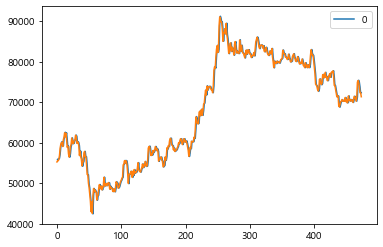

In [54]:
# 예측 결과를 시각화
import matplotlib.pyplot as plt
import pandas as pd
pred = pd.DataFrame(fit.predict())
pred[1:].plot()
samsung['Price'].plot()
plot.show()

<AxesSubplot:>

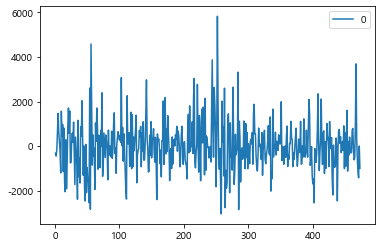

In [55]:
# 잔차 시각화
residuals = pd.DataFrame(fit.resid)
residuals[1:].plot()

In [56]:
# 이후 10일에 대한 주가 예측을 시도
fit.forecast(steps=10)

array([71277.08785583, 71259.38326292, 71242.60690063, 71229.54663441,
       71217.25988312, 71207.62840739, 71198.62770231, 71191.52672432,
       71184.93180341, 71179.69776379])

In [58]:
# *-- 실제 데이터 확인 --*
forecasts = yf.download('005930.KS',start='2021-12-01',end='2021-12-10')
forecasts

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,72000.0,74800.0,71600.0,74400.0,73684.648438,21954856
2021-12-02,73900.0,75800.0,73800.0,75800.0,75071.187500,23652940
2021-12-03,75600.0,76000.0,74100.0,75600.0,74873.109375,18330240
2021-12-06,75100.0,76700.0,74900.0,76300.0,75566.382812,16391250
2021-12-07,76100.0,77700.0,75600.0,77400.0,76655.804688,19232453
2021-12-08,78300.0,78600.0,77100.0,77400.0,76655.804688,21558340
2021-12-09,77400.0,78200.0,77000.0,78200.0,77448.117188,21604528


In [59]:
print(forecasts['Close'].values)

[74400. 75800. 75600. 76300. 77400. 77400. 78200.]


# LSTM으로 예측해보기

In [11]:
# *-- 데이터 전처리 --*
# sklearn을 활용한 data scaling
from sklearn.preprocessing import RobustScaler
# RobustScaler : Scale features using statistics that are robust to outliers.
rb = RobustScaler()

In [12]:
df_scaled = rb.fit_transform(df[['종가']])
df['종가'] = df_scaled
df.head() # 스케일링 결과 확인(-1~1 사이의 값으로 스케일링)

C:\Users\totqu\AppData\Local\Temp\ipykernel_5916\3802785048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['종가'] = df_scaled


,날짜,종가
0,2021-01-04,0.375940
1,2021-01-05,0.511278
2,2021-01-06,0.255639
3,2021-01-07,0.360902
4,2021-01-08,1.248120


In [13]:
# train, test set 분리
test_size = 100 # data split size
train_data = df[:-test_size]
test_data = df[-test_size:]

In [14]:
train_data

,날짜,종가
0,2021-01-04,0.375940
1,2021-01-05,0.511278
2,2021-01-06,0.255639
3,2021-01-07,0.360902
4,2021-01-08,1.248120
...,...,...
122,2021-06-30,0.030075
123,2021-07-01,-0.060150
124,2021-07-02,-0.075188
125,2021-07-05,-0.015038


In [15]:
test_data

,날짜,종가
127,2021-07-07,0.045113
128,2021-07-08,-0.090226
129,2021-07-09,-0.165414
130,2021-07-12,-0.120301
131,2021-07-13,-0.105263
...,...,...
222,2021-11-25,-1.022556
223,2021-11-26,-1.233083
224,2021-11-29,-1.233083
225,2021-11-30,-1.383459


In [16]:
# 당일 데이터 예측에 +n일의 과거 데이터를 반영한다.
import pandas as pd
window_size = 15 # 예측에 반영할 과거 데이터 일수

for i in range(1, 15):
    train_data[f'종가_{i}'] = train_data['종가'].shift(i)
    test_data[f'종가_{i}'] = test_data['종가'].shift(i)
        # train, test 데이터를 하루 씩 옮기면서 과거 데이터를 형성

C:\Users\totqu\AppData\Local\Temp\ipykernel_5916\3882072553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'종가_{i}'] = train_data['종가'].shift(i)
C:\Users\totqu\AppData\Local\Temp\ipykernel_5916\3882072553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'종가_{i}'] = test_data['종가'].shift(i)
C:\Users\totqu\AppData\Local\Temp\ipykernel_5916\3882072553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [17]:
# 데이터 확인
train_data.head(3)

,날짜,종가,종가_1,종가_2,종가_3,종가_4,종가_5,종가_6,종가_7,종가_8,종가_9,종가_10,종가_11,종가_12,종가_13,종가_14
0,2021-01-04,0.375940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-05,0.511278,0.375940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-06,0.255639,0.511278,0.37594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 과거 데이터가 채워지지 않으면 drop함
train_data.dropna(inplace=True)
X_train = train_data.drop('종가', axis=1)
y_train = train_data[['종가']]
test_data.dropna(inplace=True)
X_test = test_data.drop('종가', axis=1)
y_test = test_data[['종가']]

C:\Users\totqu\AppData\Local\Temp\ipykernel_5916\3512522813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace=True)
C:\Users\totqu\AppData\Local\Temp\ipykernel_5916\3512522813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace=True)


In [19]:
# train, test 사이즈를 확인하고, 신경망 학습을 위해 reshape한다
X_train= X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(113, 15) (113, 1) (86, 15) (86, 1)


In [20]:
X_train = X_train.reshape((X_train.shape[0], 15, 1 ))
X_test= X_test.reshape((X_test.shape[0], 15, 1 ))

In [21]:
import tensorflow as tf

In [22]:
# *-- 신경망 생성 --*
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
K.clear_session()

In [35]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(14, return_sequences = True, input_shape = (14, 1)))
model.add(LSTM(28, return_sequences=False))
model.add(Dense(1, activation='linear'))

In [36]:
# 모델 엮기
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 14)            896       
                                                                 
 lstm_3 (LSTM)               (None, 28)                4816      
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 모델 학습
# 과적합 방지를 위해 EarlyStopping 사용
es = EarlyStopping(monitor='loss', patience=5, verbose= 1)
model.fit(X_train, y_train, epochs = 50, batch_size=16, verbose=1, callbacks=[es])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [ ]:
# monitor : 학습 조기종료를 위해 관찰하는 항목 (default : val_loss)
# patience : 개선이 안된다고 바로 종료시키지 않고, 개선을 위해 몇번의 에포크를 기다릴지 설정
# verbose=1 로 지정하면, 언제 keras 에서 training 을 멈추었는지를 화면에 출력할 수 있다.

# yfinance 사용해보기2
- https://dacon.io/codeshare/2570

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [100]:
samsung_df = yf.download('005930.KS',start='2020-01-01',end='2021-04-21',progress=False)
samsung_df = samsung_df[["Close"]]
samsung_df = samsung_df.reset_index()
samsung_df.columns = ['day', 'price']
samsung_df['day'] = pd.to_datetime(samsung_df['day'])
samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)
samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


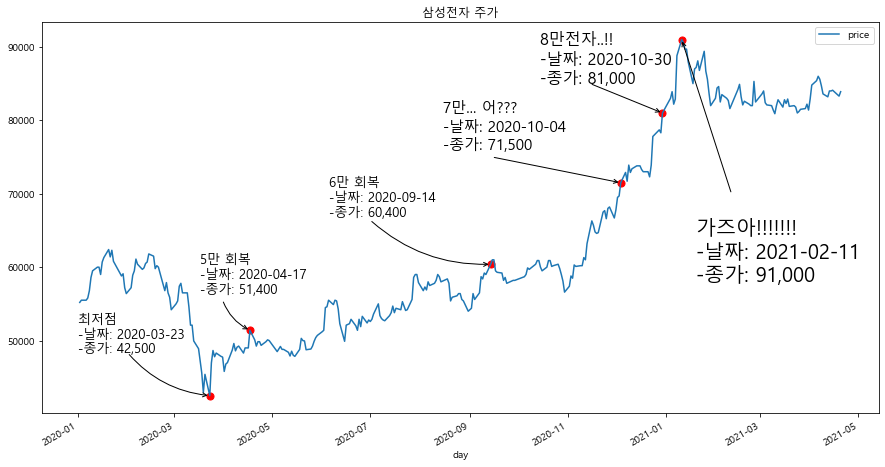

In [102]:
fig, ax = plt.subplots(figsize=(15, 8))
samsung_df.plot(ax=ax)

# 4만 최저점
ax.annotate('', xy=('2020-03-23' ,42500.0), xytext=('2020-02-01', 48300.0),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.text('2020-01-01',48300, "최저점 \n-날짜: 2020-03-23 \n-종가: 42,500",fontsize=13)

# 5만
ax.annotate('', xy=('2020-04-17' ,51400.0), xytext=('2020-03-31', 55500),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.text('2020-03-17',56400, "5만 회복 \n-날짜: 2020-04-17\n-종가: 51,400",fontsize=13)

# 6만
ax.annotate('', xy=('2020-09-14' ,60400.0), xytext=('2020-07-01', 66400),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.text('2020-06-05',66900, "6만 회복 \n-날짜: 2020-09-14\n-종가: 60,400",fontsize=13)

# 7만
ax.annotate('', xy=('2020-12-04' ,71500.0), xytext=('2020-09-15', 75000),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))

plt.text('2020-08-15',76000, "7만... 어??? \n-날짜: 2020-10-04\n-종가: 71,500",fontsize=15)

# 8만
ax.annotate('', xy=('2020-12-30' ,81000.0), xytext=('2020-11-15', 85000),arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=0"))

plt.text('2020-10-15',85000, "8만전자..!! \n-날짜: 2020-10-30\n-종가: 81,000",fontsize=16)

# 9만
ax.annotate('', xy=('2021-01-11' ,91000.0), xytext=('2021-02-11', 70000),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))

plt.text('2021-01-20',58000, "가즈아!!!!!!! \n-날짜: 2021-02-11\n-종가: 91,000",fontsize=20)



# Scatter plot 추가
y1 = ['2020-03-23','2020-04-17' ,'2020-09-14','2020-12-04','2020-12-30','2021-01-11'] 
y2 = [42500,51400,60400,71500,81000,91000]


plt.scatter(y1,y2,s=50,color='r')

plt.title("삼성전자 주가")
plt.show()

In [104]:
samsung_train_df = samsung_df[:317]
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [105]:
samsung_test_df = samsung_df[317:]
samsung_test_df

,price
day,
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0
2021-04-20,83900.0


In [110]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(samsung_train_df.price.values, order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  316
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2693.879
Method:                       css-mle   S.D. of innovations           1212.701
Date:                Wed, 27 Jul 2022   AIC                           5399.758
Time:                        03:08:34   BIC                           5422.293
Sample:                             1   HQIC                          5408.761
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.4546     68.804      1.329      0.184     -43.398     226.307
ar.L1.D.y     -1.6290      0.017    -94.431      0.000      -1.663      -1.595
ar.L2.D.y     -0.9743      0.016    -60.958      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


- 위 예제의 분석 결과와는 별개로 order 파라미터 p, d, q는 일반적인 가이드라인이 존재한다. 보통은 p와 q의 합이 2 미만인 경우, 혹은 p와 q의 곱이 0을 포함한 짝수인 경우가 좋은 파라미터의 조합이라고 알려져 있다.

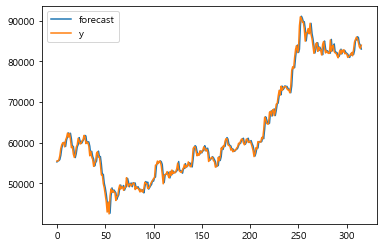

In [111]:
# 핛습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

<AxesSubplot:title={'center':'실제값과 예측값의 잔차'}>

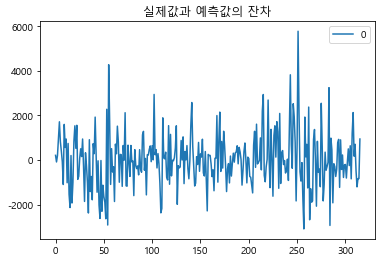

In [112]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

- 모델 평가 과정
    - model_fit.forecast(steps = 5)로 향후 5일의 가격을 예측하요 pred_y로 정의 한다.
    - bitcoin_df.iloc[361:]로 해주어 bitcoin_df의 마지막 5일을 test_y로 정의 한다.
    - 모델의 예측한 상한값, 하한값을 pred_y_upper, pred_y_lower로 정의 한다.
    - 정의한 모든 값을 비교하여 5일동안의 상승 경향 예측이 얼마나 맞는지 평가 해본다.

In [113]:
forecast_data = model_fit.forecast(steps=5) 

In [114]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

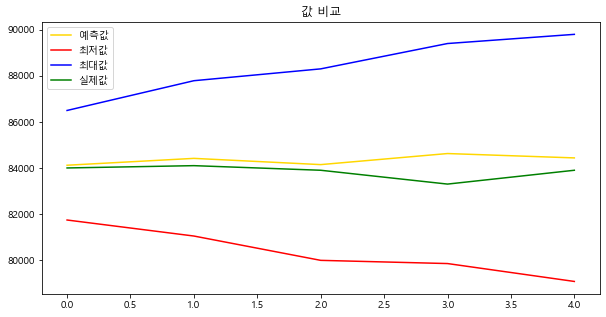

In [117]:
plt.figure(figsize=(10, 5))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 5일간 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

# Facebook Prophet 사용

- ARIMA보다 조금 더 정확한 트렌드 예측 분석을 제공하는 라이브러리 'Facebook Prophet'
- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
    - Additive 모델은 선형회귀 분석의 단점을 극복하기 위해 개량된 분석 방법의 하나

- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경
- sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
- changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [11]:
!pip install plotly

  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [12]:
from fbprophet import Prophet

In [127]:
samsung_df = samsung_df.reset_index()

# 필요한 컬럼은 ds, y 2개!(컬럼 이름을 맞춰야함)
samsung_df.columns = ['ds', 'y']

samsung_train_df = samsung_df[:317]
samsung_test_df = samsung_df[317:]

In [128]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(samsung_train_df)

In [129]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
317,2021-04-14,84739.490295,83086.258715,86319.462854
318,2021-04-15,84473.668357,82777.803128,86099.463388
319,2021-04-16,84159.711643,82369.988127,85652.757944
320,2021-04-17,75077.671354,73442.226626,76914.360716
321,2021-04-18,74749.380949,73026.690080,76442.833312


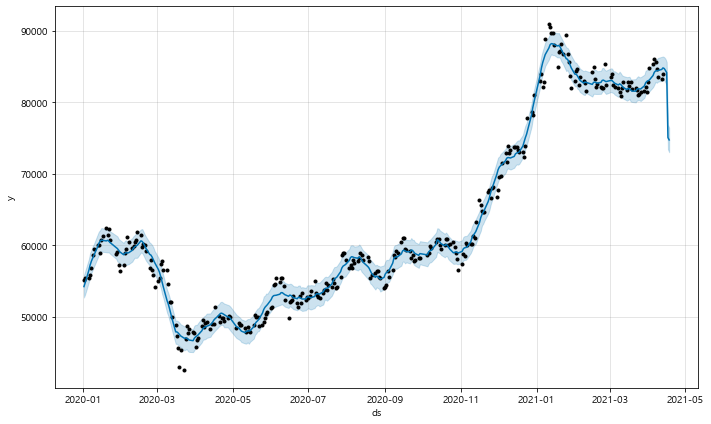

In [130]:
# 시각화
fig1 = prophet.plot(forecast_data)

- 위 그래프의 검은 점은 실제 가격을 나타낸 것이고, 파란 선은 예측 가격을 나타낸 것
- 이 모델 역시 ARIMA 모델과 마찬가지로 학습 데이터셋에 대해서는 거의 정확한 예측을 하고 있다. 
- 하지만 시계열 데이터 분석에서 학습 데이터를 잘 예측하는건 큰 의미가 없다.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


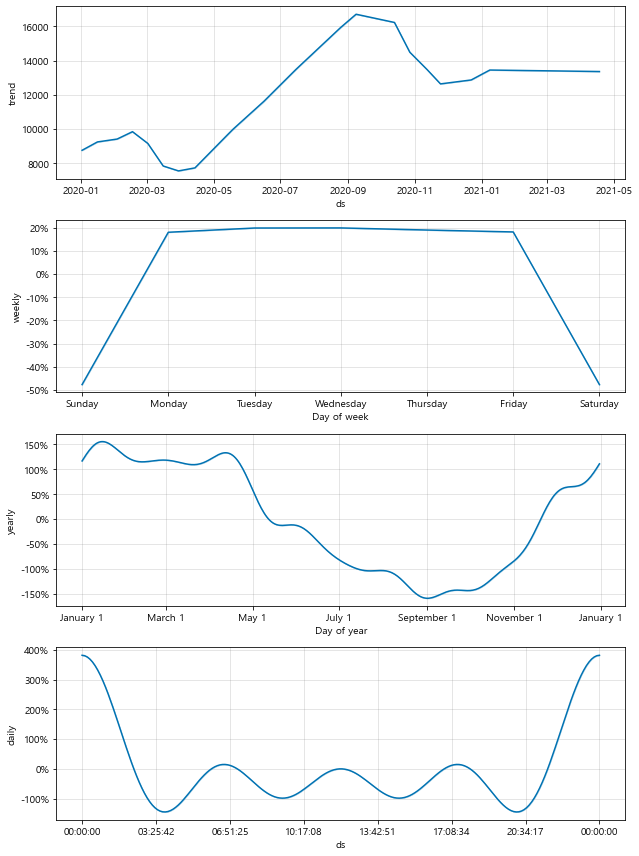

In [132]:
# 트렌드 정보 시각화 그래프
fig2 = prophet.plot_components(forecast_data)

### 테스트셋 평가

Text(0.5, 1.0, '값 비교')

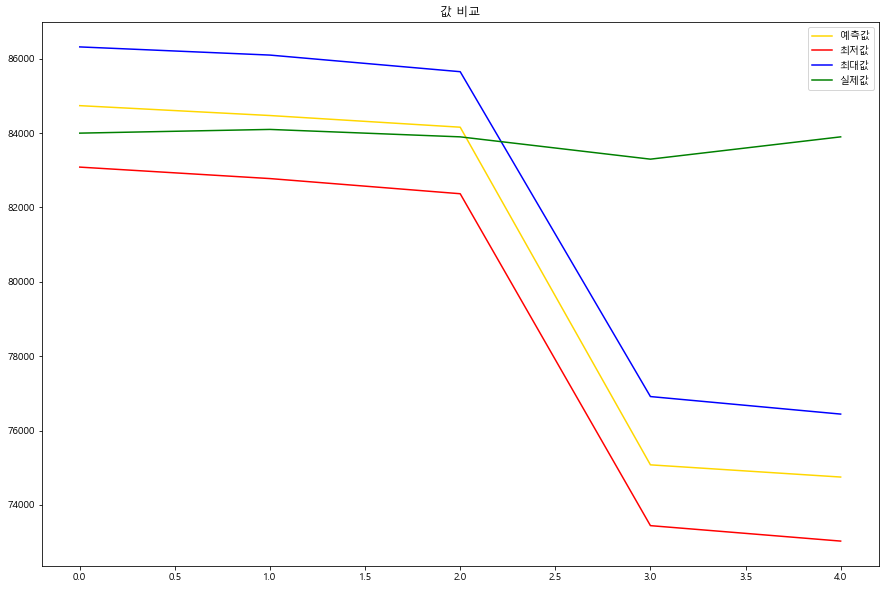

In [133]:
# 테스트셋 평가
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

### 성능 향상 해보기

- 상한값 혹은 하한값을 지정
    - 바닥과 천장이 없는 주가 데이터의 경우 의미가 없을 수 있지만 일반적인 시계열 데이터에서는 상한값 혹은 하한값을 설정해 주는 것이 모델의 성능을 높여줄 수 있는 방법중 하나이다.

C:\Users\totqu\AppData\Local\Temp\ipykernel_22956\2630263400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_train_df['cap'] = 90000


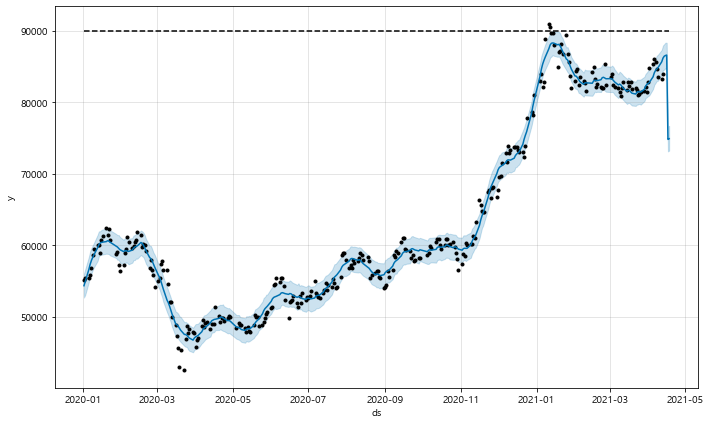

In [134]:
# 상한가 설정
samsung_train_df['cap'] = 90000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 90000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

- 이상치 제거
- 63000이 넘는 데이터를 이상치라고 설정

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


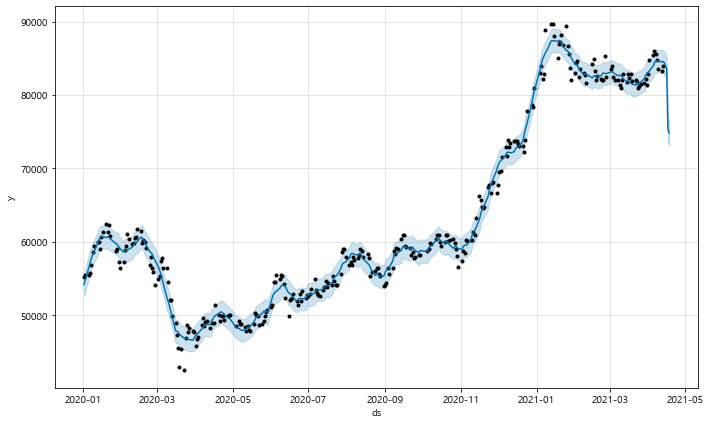

In [135]:
samsung_train_df.loc[samsung_train_df['y'] > 90000, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [138]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]
pred_fbprophet_y_1

array([84415.2004384 , 84013.57139801, 83566.7781954 , 75339.50039684,
       74832.63792476])

### RMSE

In [137]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   'FBprophet 이상치 제거 후(90000) 예측값':pred_fbprophet_y_1,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,FBprophet 이상치 제거 후(90000) 예측값,실제값
0,84117.986497,84739.490295,84415.200438,84000.0
1,84415.938466,84473.668357,84013.571398,84100.0
2,84145.158459,84159.711643,83566.778195,83900.0
3,84625.497557,75077.671354,75339.500397,83300.0
4,84436.392993,74749.380949,74832.637925,83900.0


- 모델별 예측값 시각화

Text(0.5, 1.0, '값 비교')

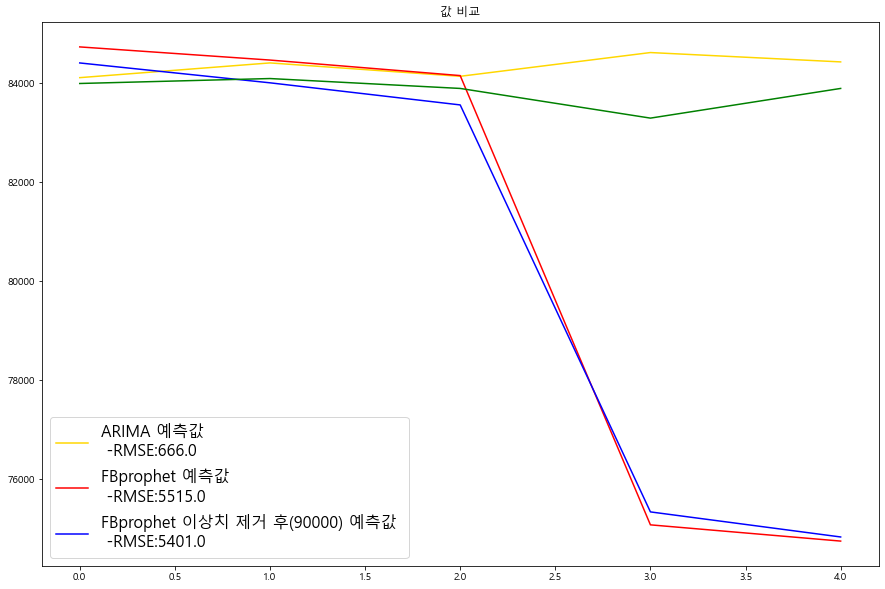

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의  rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(df[['FBprophet 이상치 제거 후(90000) 예측값']], color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'FBprophet 이상치 제거 후(90000) 예측값 \n -RMSE:' + str(round(rmse_fbprophet_1,0))])
plt.title("값 비교")

- ARIMA보다 FBprophet모델이 더 좋은 성능을 보인다고 알고 있지만 이번에는 왜인지 ARIMA가 가장 좋게 나오는 경향을 보인다

- 다른 티스토리
- https://cordingdiary.tistory.com/109